# Loading Library

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# for sql 
import mysql.connector 

# connection mysql database to python

In [42]:
try:
# Establish a connection to mysql database
    con = mysql.connector.connect(
        host= '127.0.01',
        user = 'root',
        password='12345',
        database = 'music_store'
)

    if con.is_connected():
        print('Connected to mysql  database')

except mysql.connector.Error as e:
    print(f'Error connecting to mysql database: {e}')
    

con_to_mysql('127.0.0.1','music_store','root','12345')




Error connecting to mysql database: 2003: Can't connect to MySQL server on '%-.100s:%u' (%s) (Warning: %u format: a real number is required, not str)
Connected to mysql  database


# All table in Database

In [48]:

pd.read_sql_query('show tables',con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\3976490377.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('show tables',con)


,Tables_in_music_store
0,artist
1,customer
2,employee
3,genre
4,invoice
5,invoice_line
6,media_type
7,playlist
8,playlist_track
9,track


# total  invoice amount by each year

C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\2883008721.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\2883008721.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df1['Years'],x=df1['total_amount'],palette='cool',orient='h')


Text(0.5, 1.0, 'Total Invoice Amount by years')

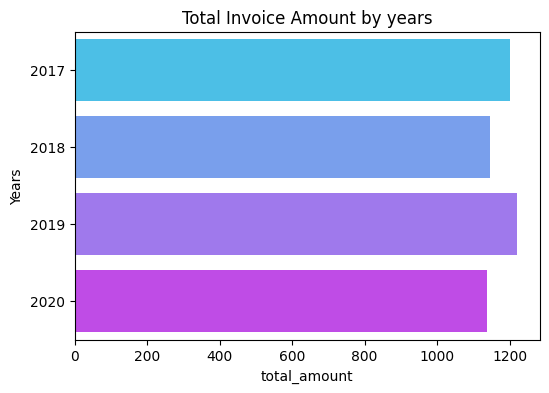

In [49]:
df1 = pd.read_sql_query(""" 
select year(invoice_date) as Years,
sum(total) as total_amount
from invoice

group by Years""",con)

plt.figure(figsize=(6,4))
sns.barplot(y=df1['Years'],x=df1['total_amount'],palette='cool',orient='h')
plt.title('Total Invoice Amount by years')


C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\3147893304.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top10_high_country_revenue = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\3147893304.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top10_low_country_revenue = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\3147893304.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_high_country_revenue['country'],y=top10_high_country_revenue['total_revenue'],ax=ax[0],p

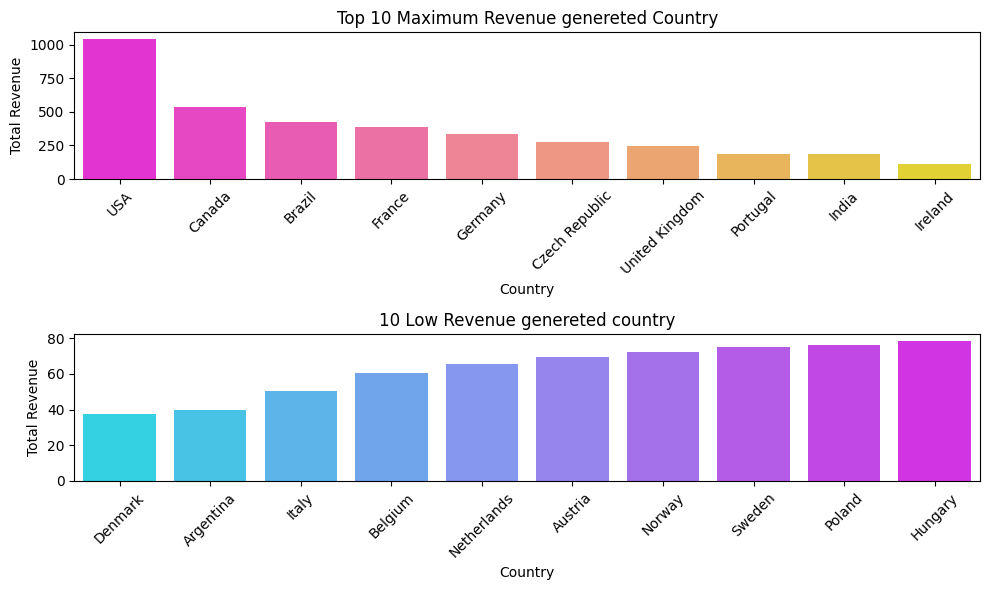

In [57]:
top10_high_country_revenue = pd.read_sql_query("""
select c.country,sum(i.total) as total_revenue from customer  c
join invoice i 
on c.customer_id = i.customer_id

group by c.country
order by total_revenue desc 
limit 10""",con)

top10_low_country_revenue = pd.read_sql_query("""
select c.country,sum(i.total) as total_revenue from customer  c
join invoice i 
on c.customer_id = i.customer_id

group by c.country
order by total_revenue asc 
limit 10""",con)

fig,ax = plt.subplots(2,1,figsize=(10,6))

sns.barplot(x=top10_high_country_revenue['country'],y=top10_high_country_revenue['total_revenue'],ax=ax[0],palette='spring')
ax[0].set_title('Top 10 Maximum Revenue genereted Country')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Total Revenue')
ax[0].tick_params(axis='x', rotation=45)


sns.barplot(x=top10_low_country_revenue['country'], y=top10_low_country_revenue['total_revenue'], ax=ax[1],palette='cool')
ax[1].set_title('10 Low Revenue genereted country')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Total Revenue')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Total invoice by each month from 2017 to 2020

In [5]:
t_2017 = pd.read_sql_query(""" 
select monthname(invoice_date) as months,
sum(total) total_amount

from invoice
where year(invoice_date) = 2017
group by months""",con)

t_2018 = pd.read_sql_query(""" 
select monthname(invoice_date) as months,
sum(total) total_amount

from invoice
where year(invoice_date) = 2018
group by months""",con)

t_2019 = pd.read_sql_query(""" 
select monthname(invoice_date) as months,
sum(total) total_amount

from invoice
where year(invoice_date) = 2019
group by months""",con)

t_2020 = pd.read_sql_query(""" 
select monthname(invoice_date) as months,
sum(total) total_amount

from invoice
where year(invoice_date) = 2020
group by months""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\1168600692.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  t_2017 = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\1168600692.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  t_2018 = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\1168600692.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  t_2019 = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\1168600692.py:25: UserWarning: pandas only sup

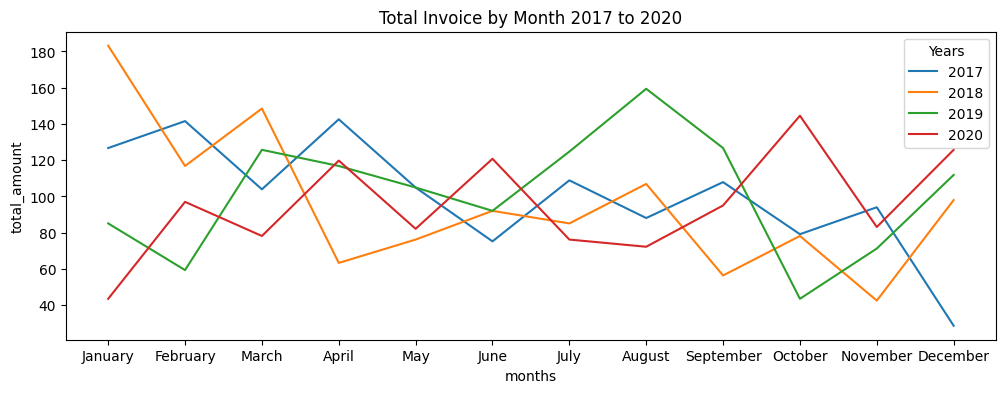

In [6]:
plt.figure(figsize=(12,4))
sns.lineplot(x=t_2017['months'],y=t_2017['total_amount'],label='2017',markers='d')
sns.lineplot(x=t_2018['months'],y=t_2018['total_amount'],label='2018',markers='o')
sns.lineplot(x=t_2020['months'],y=t_2019['total_amount'],label='2019',markers='o')
sns.lineplot(x=t_2020['months'],y=t_2020['total_amount'],label='2020',markers='o')

plt.title('Total Invoice by Month 2017 to 2020')
plt.legend(title='Years')

the total number of tracks in each playlist

C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\1247817723.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\1247817723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['No_of_track'], y=df['name'], palette='cool')


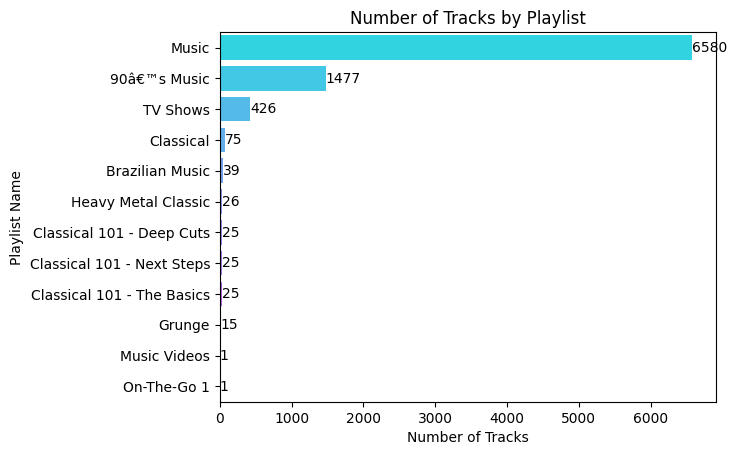

In [39]:
df = pd.read_sql_query("""
select p.name,count(pt.track_id) as No_of_track from playlist p
join playlist_track pt 
on p.playlist_id = pt.playlist_id
group by p.name
order by No_of_track desc

""",con)

# Create the bar plot
ax = sns.barplot(x=df['No_of_track'], y=df['name'], palette='cool')

# Add title and labels
plt.title("Number of Tracks by Playlist")
plt.xlabel("Number of Tracks")
plt.ylabel("Playlist Name")

# Add labels on top of the bars using f-strings
for index, row in df.iterrows():
    ax.text(row['No_of_track'], index, f"{row['No_of_track']}", va='center', ha='left', fontsize=10)

# Show the plot
plt.show()


# the names of customers who have an invoice total greater than the average invoice total.

In [20]:
pd.read_sql_query(""" 
select concat(c.first_name,' ',c.last_name) as customer_name,
sum(i.total) as total_invoice 
from customer c
join invoice i 
on c.customer_id = i.customer_id
group by customer_name
having sum(i.total) > (select avg(total) from invoice)
""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3577049577.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,customer_name,total_invoice
0,Michelle Brooks,79.20
1,Edward Francis,91.08
2,Dominique Lefebvre,72.27
3,Patrick Gray,84.15
4,Martha Silk,62.37
5,StanisÅ‚aw WÃ³jcik,76.23
6,Rishabh Mishra,71.28
7,Niklas SchrÃ¶der,73.26
8,Wyatt Girard,99.99
9,Madalena Sampaio,82.17


# the total number of customers in each country.

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3912853368.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3912853368.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df['country'],x=df['number_of_customer'],palette='cool')


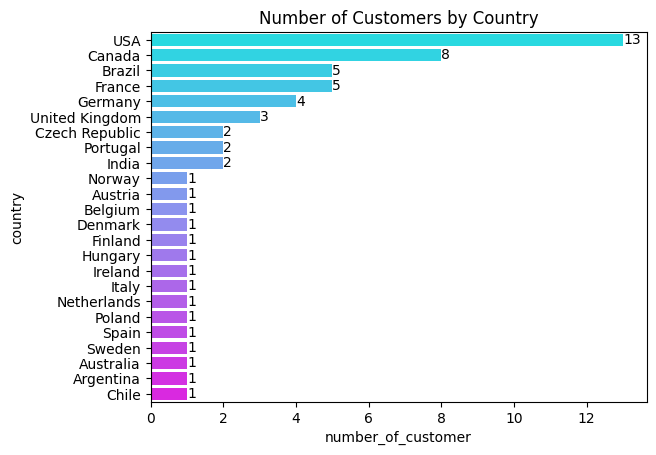

In [36]:
df = pd.read_sql_query(""" 
select country,count(customer_id) as number_of_customer from customer
group by country
order by number_of_customer desc
""",con)

ax = sns.barplot(y=df['country'],x=df['number_of_customer'],palette='cool')
# Add labels to the bars
for i, value in enumerate(df['number_of_customer']):
    ax.annotate(f"{value}", xy=(value, i), va='center', ha='left', fontsize=10)

plt.title('Number of Customers by Country')
plt.show()

# the names of customers along with their total quantity of tracks purchased.

In [43]:
pd.read_sql_query(""" 
select concat(c.first_name,' ',c.last_name) as customer_name,
sum(il.quantity) total_track_purchased
from customer c
join invoice i 
on c.customer_id = i.customer_id
join invoice_line il 
on il.invoice_id = i.invoice_id

group by customer_name
order by total_track_purchased desc
""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\1125362153.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,customer_name,total_track_purchased
0,FrantiÅ¡ek WichterlovÃ¡,146.0
1,Helena HolÃ½,130.0
2,Hugh O'Reilly,116.0
3,Manoj Pareek,113.0
4,LuÃ­s GonÃ§alves,110.0
5,Fernanda Ramos,108.0
6,JoÃ£o Fernandes,104.0
7,FranÃ§ois Tremblay,101.0
8,Wyatt Girard,101.0
9,Phil Hughes,99.0


# the total number of tracks in each genre.

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3559373598.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3559373598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y =df['name'],x =df['no_of_track'],data=df,palette='cool')


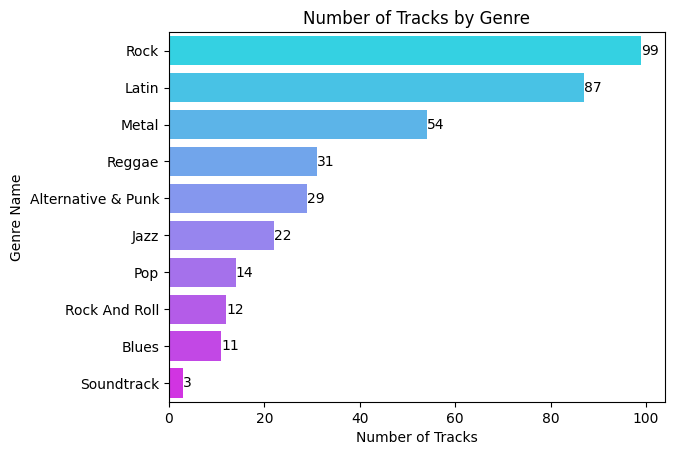

In [64]:
df = pd.read_sql_query(""" 
select g.name, count(t.track_id) as no_of_track from track t
join genre g on
t.genre_id = g.genre_id
group by g.name
order by no_of_track desc
""",con)
sns.barplot(y =df['name'],x =df['no_of_track'],data=df,palette='cool')
# Add labels to the bars
for i, value in enumerate(df['no_of_track']):
    plt.annotate(f"{value}", xy=(value, i), va='center', fontsize=10)

# Add labels to the axes and a title
plt.xlabel('Number of Tracks')
plt.ylabel('Genre Name')
plt.title('Number of Tracks by Genre')

plt.show()

# the total revenue generated by each employee (as support representative).

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\4258944506.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\4258944506.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df['employee_name'],x=df['total_revenue'],palette='cool',data=df)


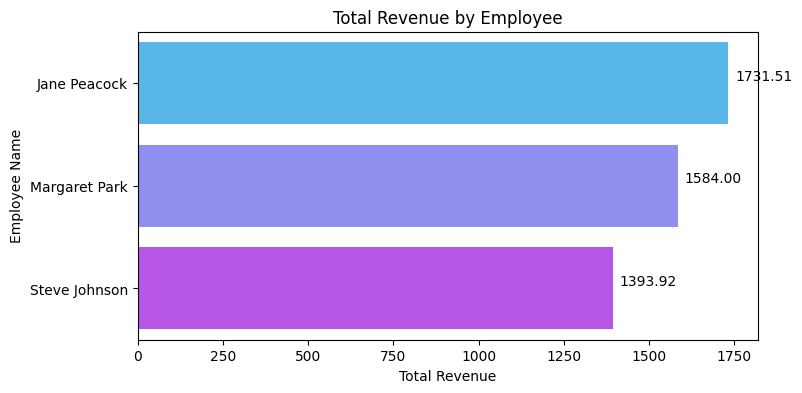

In [92]:
df = pd.read_sql_query(""" 
SELECT 
    concat(employee.first_name,' ',employee.last_name) as  employee_name, SUM(invoice.total) AS total_revenue
FROM employee
JOIN customer ON employee.employee_id = customer.support_rep_id
JOIN invoice ON customer.customer_id = invoice.customer_id
GROUP BY employee_name
order by total_revenue desc


""",con)
plt.figure(figsize=(8,4))
ax = sns.barplot(y=df['employee_name'],x=df['total_revenue'],palette='cool',data=df)

# Add labels to the bars (positioned above the bars)
for i, value in enumerate(df['total_revenue']):
    ax.annotate(f'{value:.2f}', xy=(value, i), xytext=(5, 5), textcoords='offset points', va='center', fontsize=10)

plt.xlabel('Total Revenue')
plt.ylabel('Employee Name')
plt.title('Total Revenue by Employee')

plt.show()

# the total amount of invoices in each country.

In [96]:
revenue_by_country = pd.read_sql_query(""" 
select 
    billing_country,
    sum(total)  total_revenue
from invoice 
    group by billing_country
    order by total_revenue desc""",con)

revenue_by_country

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\2940473463.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue_by_country = pd.read_sql_query("""


,billing_country,total_revenue
0,USA,1040.49
1,Canada,535.59
2,Brazil,427.68
3,France,389.07
4,Germany,334.62
5,Czech Republic,273.24
6,United Kingdom,245.52
7,Portugal,185.13
8,India,183.15
9,Ireland,114.84


C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\568656160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_country['total_revenue'].head(10),y=revenue_by_country['billing_country'].head(10),palette='cool')


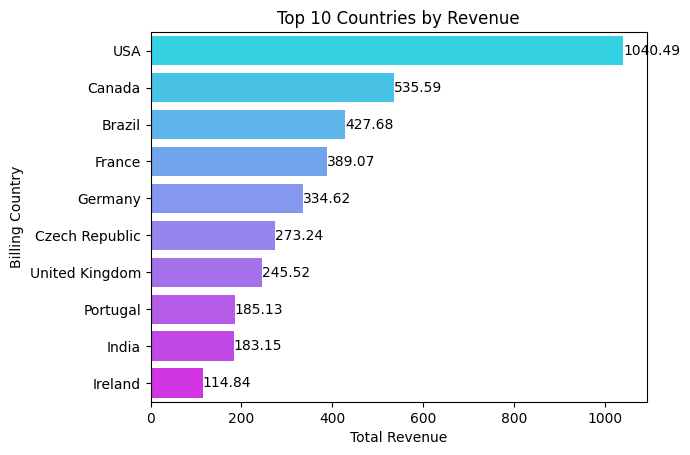

In [100]:
sns.barplot(x=revenue_by_country['total_revenue'].head(10),y=revenue_by_country['billing_country'].head(10),palette='cool')
# Add title, x-label, and y-label
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Billing Country")

# Add labels on the bars
for index, value in enumerate(revenue_by_country['total_revenue'].head(10)):
    plt.text(value, index, f"{value:.2f}", va='center')

# Show the plot
plt.show()

# the top 3 genres by total revenue generated.

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3829053624.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_3_genre = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3829053624.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_genre['name'],y=top_3_genre['total_revenue'],palette='cool')


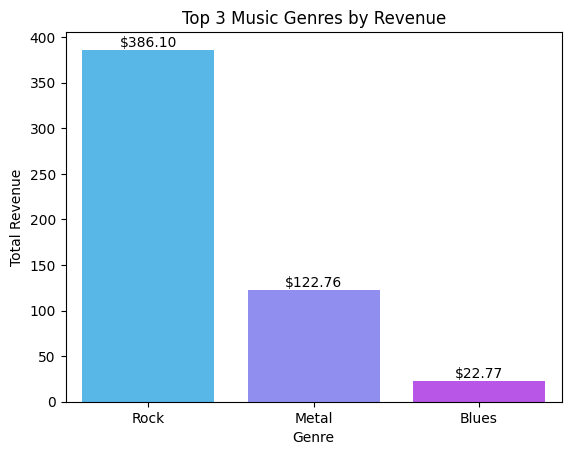

In [106]:
top_3_genre = pd.read_sql_query("""
SELECT 
    genre.name, 
    SUM(invoice_line.unit_price * invoice_line.quantity) AS total_revenue
FROM genre
    JOIN track ON genre.genre_id = track.genre_id
    JOIN invoice_line ON track.track_id = invoice_line.track_id
GROUP BY genre.name
ORDER BY total_revenue DESC
LIMIT 3;

""",con)

sns.barplot(x=top_3_genre['name'],y=top_3_genre['total_revenue'],palette='cool')

# Add title, x-label, and y-label
plt.title("Top 3 Music Genres by Revenue")
plt.xlabel("Genre")
plt.ylabel("Total Revenue")

# Add labels on the bars
for index, value in enumerate(top_3_genre['total_revenue']):
    plt.text(index, value, f"${value:.2f}", ha='center', va='bottom')

# Show the plot
plt.show()

# the top 5 most frequently purchased tracks.

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\1067447299.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  track_purchased = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\1067447299.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=track_purchased['times_purchased'], y=track_purchased['name'], palette='cool')


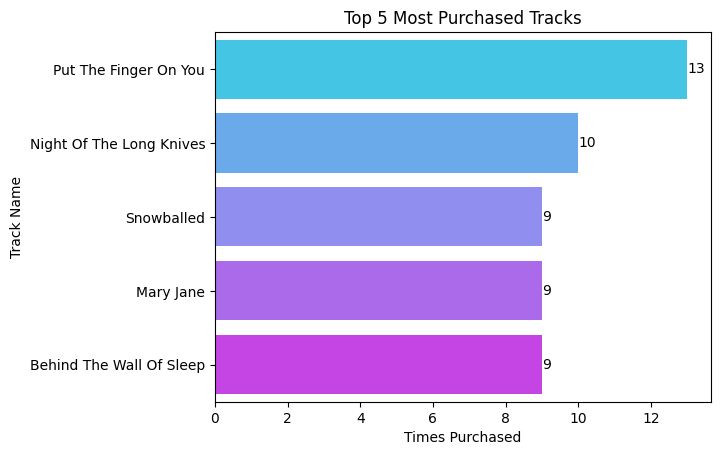

In [111]:
track_purchased = pd.read_sql_query(""" 
SELECT 
    track.name, 
    COUNT(invoice_line.track_id) AS times_purchased
FROM track
    JOIN invoice_line ON track.track_id = invoice_line.track_id
GROUP BY track.name
ORDER BY times_purchased DESC
LIMIT 5;
 """,con)

sns.barplot(x=track_purchased['times_purchased'], y=track_purchased['name'], palette='cool')

# Add title, x-label, and y-label
plt.title("Top 5 Most Purchased Tracks")
plt.xlabel("Times Purchased")
plt.ylabel("Track Name")

# Add labels on the bars
for index, value in enumerate(track_purchased['times_purchased']):
    plt.text(value, index, f"{value}", va='center')

# Show the plot
plt.show()

#  the total number of invoices issued each year

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\2316469344.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  year_wise_purchased = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\2316469344.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_wise_purchased['year'], y=year_wise_purchased['total_invoices'], palette='cool')


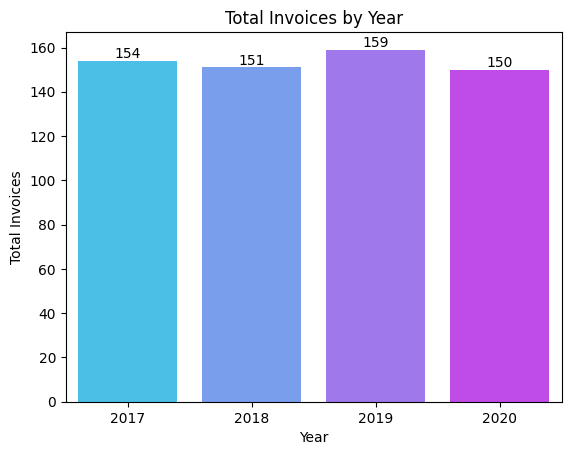

In [115]:
year_wise_purchased = pd.read_sql_query(""" 
SELECT 
    YEAR(invoice_date) AS year, 
    COUNT(invoice_id) AS total_invoices
FROM invoice
GROUP BY YEAR(invoice_date);
 """,con)

sns.barplot(x=year_wise_purchased['year'], y=year_wise_purchased['total_invoices'], palette='cool')

# Add title, x-label, and y-label
plt.title("Total Invoices by Year")
plt.xlabel("Year")
plt.ylabel("Total Invoices")

# Add labels on the bars
for index, value in enumerate(year_wise_purchased['total_invoices']):
    plt.text(index, value, f"{value}", ha='center', va='bottom')

# Show the plot
plt.show()

 the top 3 most expensive tracks.

In [117]:
pd.read_sql_query(""" 
SELECT 
    name, 
    unit_price
FROM track
    ORDER BY unit_price DESC
    LIMIT 3;
 """,con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\30881369.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,name,unit_price
0,For Those About To Rock (We Salute You),0.99
1,Balls to the Wall,0.99
2,Fast As a Shark,0.99


# the customer names along with the total number of orders placed by each customer

In [7]:

pd.read_sql_query(""" 
select concat(c.first_name,' ',c.last_name) as customer_name,
count(i.invoice_id) no_of_order from invoice i
join customer c on i.customer_id=c.customer_id
group by customer_name
order by no_of_order desc""",con)



C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\2813562690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,customer_name,no_of_order
0,FrantiÅ¡ek WichterlovÃ¡,18
1,Madalena Sampaio,16
2,Fernanda Ramos,15
3,Edward Francis,13
4,Hugh O'Reilly,13
5,LuÃ­s GonÃ§alves,13
6,Manoj Pareek,13
7,Luis Rojas,13
8,JoÃ£o Fernandes,13
9,Richard Cunningham,12


# the distribution of sales revenue across the top 10 countries for each year from 2017 to 2020

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\143279279.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


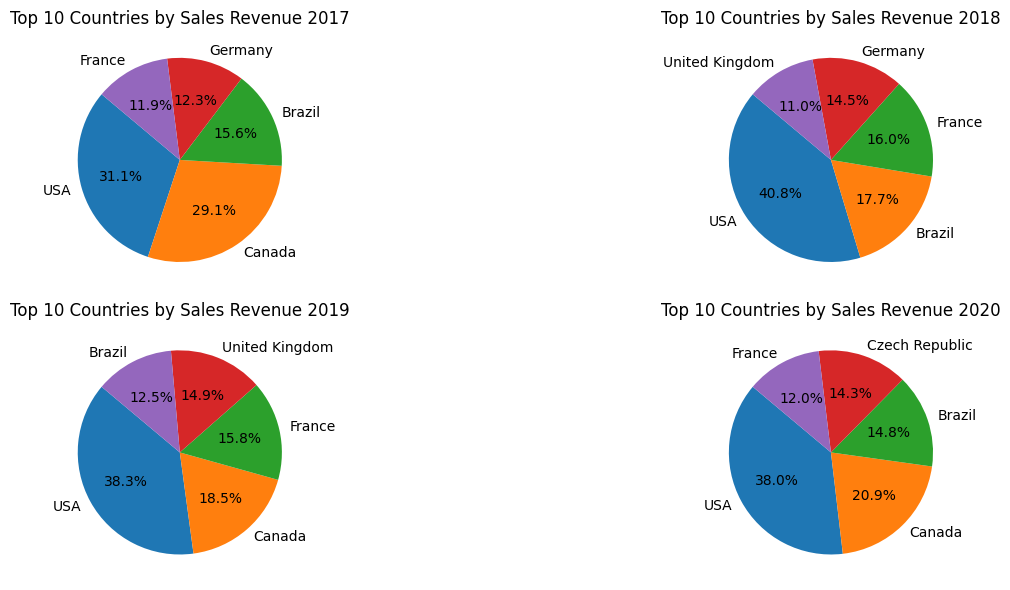

In [121]:


# List of years to query
years = [2017, 2018, 2019, 2020]

# Create a figure with 4 subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(16,6))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop to query data for each year and plot the pie chart
for i, year in enumerate(years):
    query = f"""
        SELECT billing_country AS country, SUM(total) AS total_amount
        FROM invoice
        WHERE YEAR(invoice_date) = {year}
        GROUP BY country
        ORDER BY total_amount DESC
        LIMIT 5
    """
    df = pd.read_sql_query(query, con)
    
    # Plot the pie chart
    axs[i].pie(df['total_amount'], labels=df['country'], autopct='%1.1f%%', startangle=140,)
    axs[i].set_title(f'Top 10 Countries by Sales Revenue {year}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# the total monthly revenue for each year (2017 to 2020) based on the sales data

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\2895937815.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


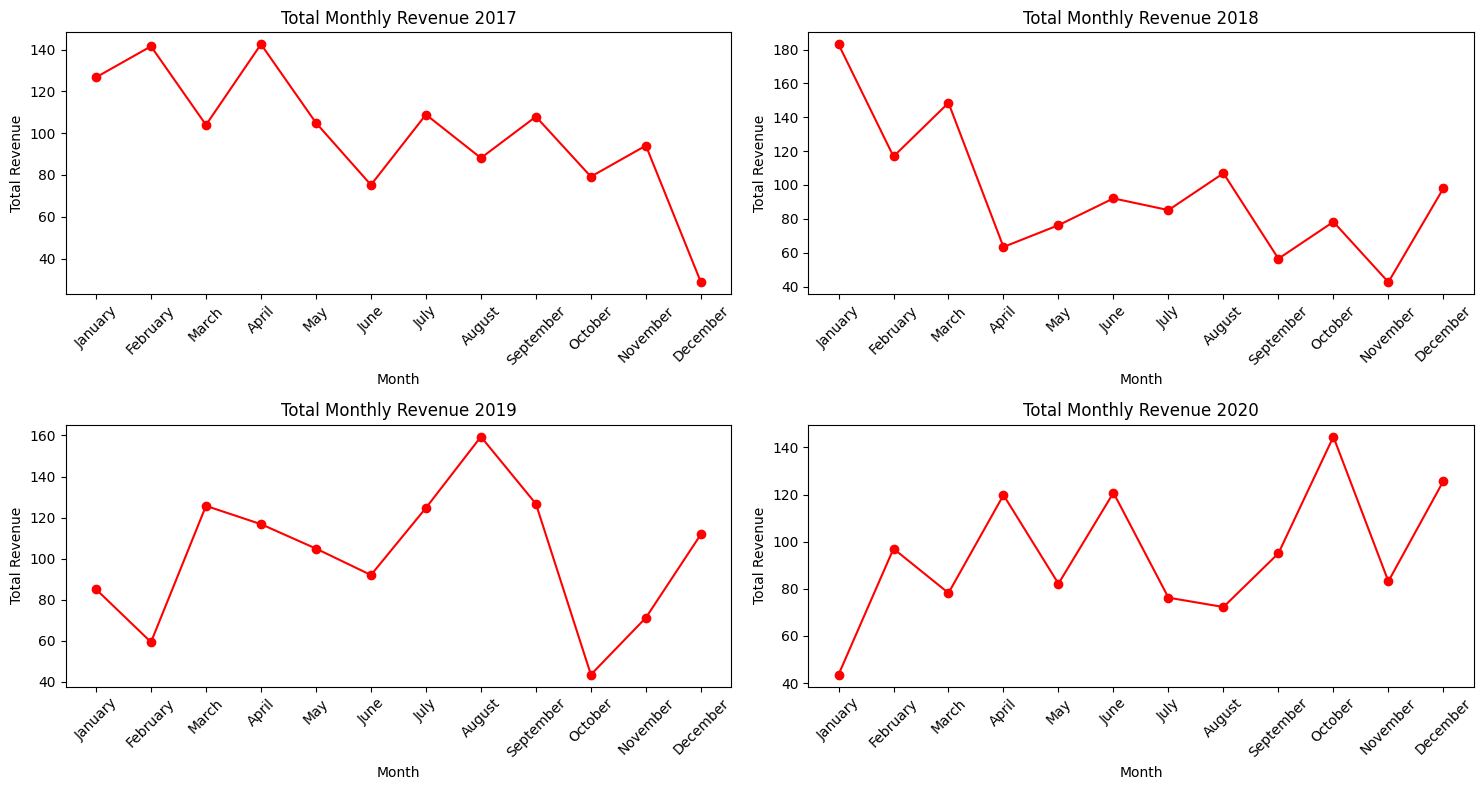

In [11]:

# List of years to query
years = [2017, 2018, 2019, 2020]

# Create a figure with 4 subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop to query data for each year and plot the line chart
for i, year in enumerate(years):
    query = f"""
        SELECT MONTHNAME(invoice_date) AS month, SUM(total) AS total_amount
        FROM invoice
        WHERE YEAR(invoice_date) = {year}
        GROUP BY month
        
    """
    df = pd.read_sql_query(query, con)
    
    # Plot the line chart
    axs[i].plot(df['month'], df['total_amount'], marker='o',color='red')
    axs[i].set_title(f'Total Monthly Revenue {year}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Total Revenue')
    axs[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# the top 5 countries with the highest number of customers

C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3714590835.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_2768\3714590835.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['country'],y=df['customer_count'],palette='spring')


Text(0.5, 1.0, 'Total Customer by Country')

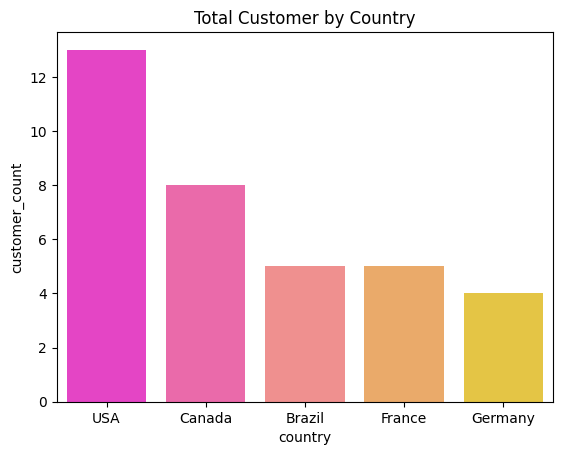

In [123]:
df = pd.read_sql_query(""" 
select country, count(country) as customer_count  from customer
group by country
order by customer_count desc
limit 5

""",con)

sns.barplot(x=df['country'],y=df['customer_count'],palette='spring')
plt.title('Total Customer by Country')

# top 10 states with the highest total revenue generated

C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\2831278753.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_10_genereted_state  = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\2831278753.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genereted_state['state'],y=top_10_genereted_state['total_amount'],palette='viridis')


Text(0.5, 1.0, 'Top 10 high Genereted state')

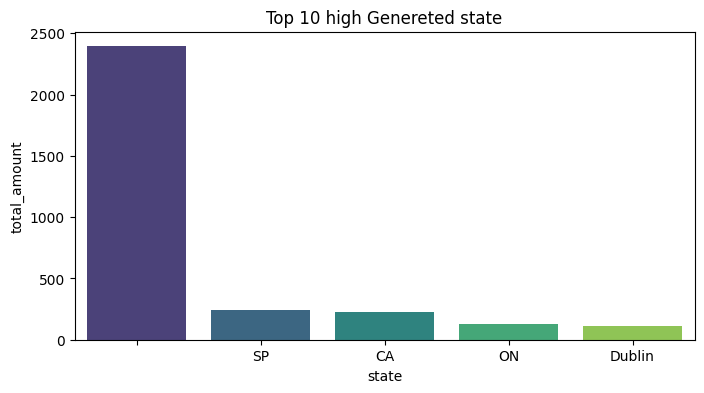

In [40]:
top_10_genereted_state  = pd.read_sql_query(""" 
select c.state, sum(total) as total_amount from customer c 
join invoice i 
on c.customer_id = i.customer_id
group by state
order by total_amount desc
limit 5
""",con)
plt.figure(figsize=(8,4))
sns.barplot(x=top_10_genereted_state['state'],y=top_10_genereted_state['total_amount'],palette='viridis')
plt.title('Top 10 high Genereted state')




# top 10 genres with the highest number of tracks

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\2065964160.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  genre_count = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\2065964160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count['name'],y=genre_count['genre_count'],palette='viridis')


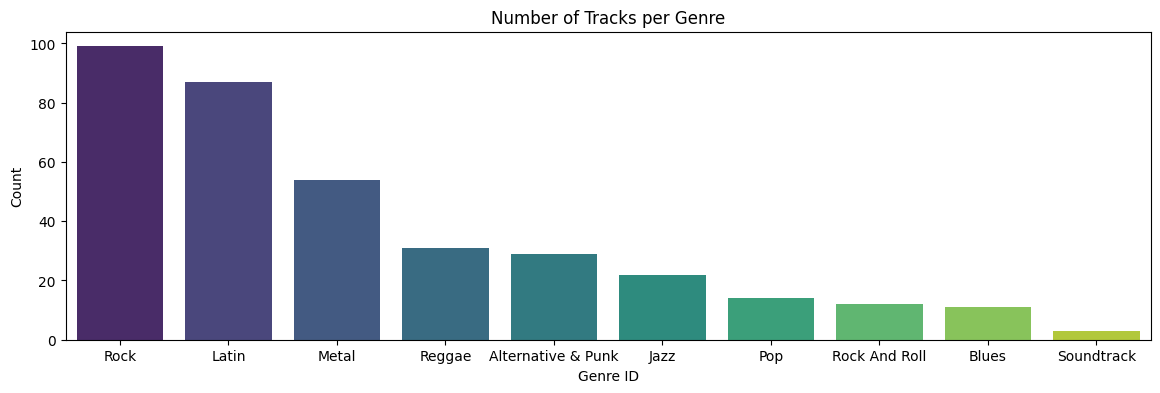

In [133]:
genre_count = pd.read_sql_query("""
select g.name,
count(t.track_id) as genre_count from track t
join genre g on t.genre_id = g.genre_id
group by g.name
order by genre_count desc
""",con)

plt.figure(figsize=(14,4))
sns.barplot(x=genre_count['name'],y=genre_count['genre_count'],palette='viridis')
plt.title('Number of Tracks per Genre')
plt.xlabel('Genre ID')
plt.ylabel('Count')
plt.show()

# Total number of artist

In [151]:
artist = pd.read_sql_query(""" select count(artist_id) from artist""",con)
# print(f'total no of artist {artist['count(artist_id)']}')
print(f'The total no of artist is {artist['count(artist_id)'][0]}')

The total no of artist is 275


C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\3090259168.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  artist = pd.read_sql_query(""" select count(artist_id) from artist""",con)


# the top 5 customers with the highest total spend

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\3779123734.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_spend_customer = pd.read_sql_query("""
C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\3779123734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spend_customer['customer_name'],y=top_spend_customer['total_spend'],palette='viridis')


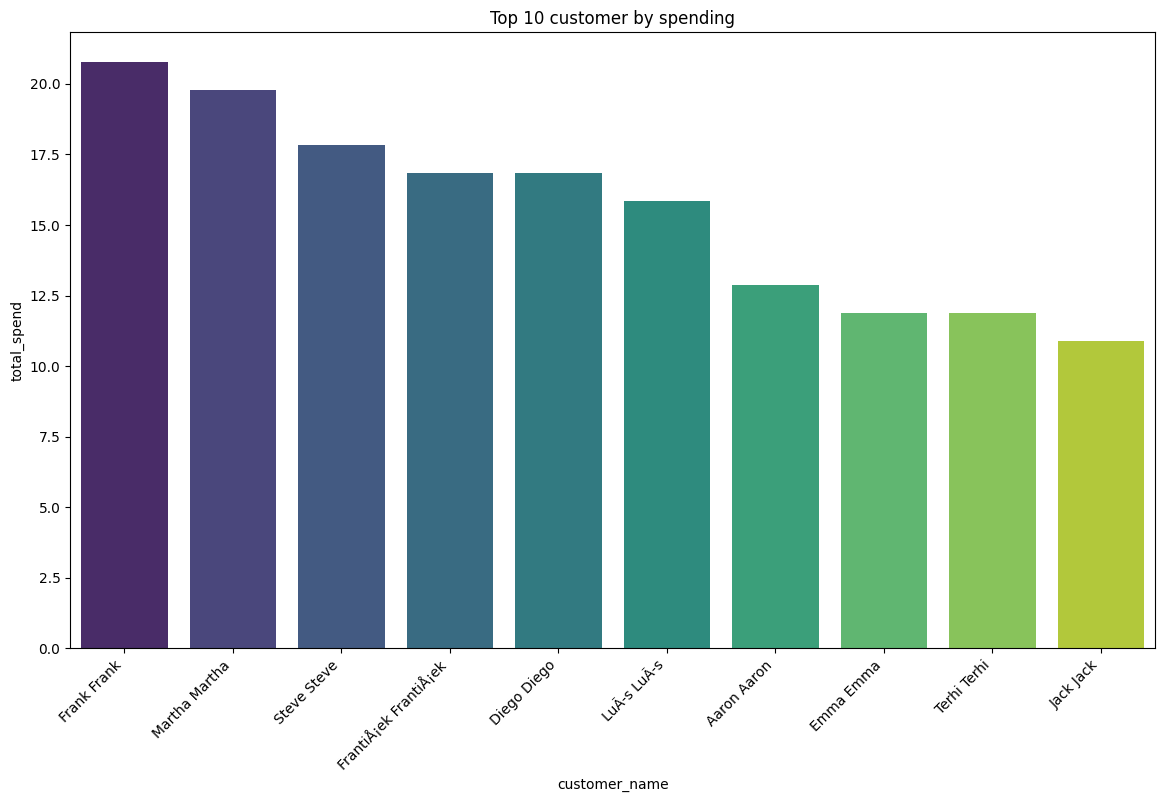

In [163]:
top_spend_customer = pd.read_sql_query("""
select concat(c.first_name,' ',c.first_name) as customer_name,
sum(i.total) total_spend
from customer c
join invoice i 
on c.customer_id = i.invoice_id
group by customer_name
order by total_spend desc
limit 10

""",con)
plt.figure(figsize=(14,8))
sns.barplot(x=top_spend_customer['customer_name'],y=top_spend_customer['total_spend'],palette='viridis')
plt.title('Top 10 customer by spending')
plt.xticks(rotation=45,ha='right')
plt.show()

Find the total amount invoiced in each billing country.

In [188]:
pd.read_sql_query(""" 
select billing_country,sum(total) as total_spend from invoice
group by billing_country
order by total_spend desc
""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\246613618.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,billing_country,total_spend
0,USA,1040.49
1,Canada,535.59
2,Brazil,427.68
3,France,389.07
4,Germany,334.62
5,Czech Republic,273.24
6,United Kingdom,245.52
7,Portugal,185.13
8,India,183.15
9,Ireland,114.84


# The names of customers who have never made a purchase.

In [190]:
pd.read_sql_query("""
 select first_name,last_name from customer
 where customer_id not in (select customer_id from invoice)""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\785882125.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,first_name,last_name


# The average unit price of tracks for each genre.

In [194]:
pd.read_sql_query(""" 
select g.name as genre_name,
avg(t.unit_price) as average_price
 from track t 
join genre g on t.genre_id = t.genre_id
group by g.name
""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\1168637697.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,genre_name,average_price
0,Opera,0.99
1,Classical,0.99
2,Alternative,0.99
3,Comedy,0.99
4,Drama,0.99
5,Sci Fi & Fantasy,0.99
6,TV Shows,0.99
7,Science Fiction,0.99
8,Hip Hop/Rap,0.99
9,World,0.99


# List the top 5 most expensive tracks.

In [41]:
pd.read_sql_query(""" select name,unit_price from track
order by unit_price desc limit 5""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_4080\922447703.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(""" select name,unit_price from track


,name,unit_price
0,For Those About To Rock (We Salute You),0.99
1,Balls to the Wall,0.99
2,Fast As a Shark,0.99
3,Restless and Wild,0.99
4,Princess of the Dawn,0.99


# the count of tracks for each media type

In [199]:
pd.read_sql_query(""" 
select mt.name , count(*) from track t
join media_type mt 
on t.media_type_id = mt.media_type_id
group by mt.name
""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\804067710.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,name,count(*)
0,MPEG audio file,358
1,Protected AAC audio file,4


# List all customers along with the number of invoices they have made

In [202]:
pd.read_sql_query("""
select concat(c.first_name,' ',c.last_name) as customer_name 
,count(i.invoice_id) as invoice_count
from customer c 
join invoice i on c.customer_id = i.customer_id
group by customer_name
order by invoice_count desc
""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\528793618.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,customer_name,invoice_count
0,FrantiÅ¡ek WichterlovÃ¡,18
1,Madalena Sampaio,16
2,Fernanda Ramos,15
3,Edward Francis,13
4,Hugh O'Reilly,13
5,LuÃ­s GonÃ§alves,13
6,Manoj Pareek,13
7,Luis Rojas,13
8,JoÃ£o Fernandes,13
9,Richard Cunningham,12


In [206]:
pd.read_sql_query(""" select p.name 
from playlist p 
join playlist_track pt 
on p.playlist_id= pt.playlist_id 
group by p.name
having count(pt.track_id) > 5""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\2518771537.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(""" select p.name


,name
0,Music
1,TV Shows
2,90â€™s Music
3,Brazilian Music
4,Classical
5,Classical 101 - Deep Cuts
6,Classical 101 - Next Steps
7,Classical 101 - The Basics
8,Grunge
9,Heavy Metal Classic


# the details of the invoice that has the most invoice lines.

In [115]:
pd.read_sql_query("""
select concat(c.first_name, ' ',c.last_name) as customer_name,
sum(i.total) over(partition by c.country ) as total_amount 
from customer c
join invoice i on c.customer_id=i.customer_id
order by total_amount desc



""",con)

C:\Users\nikes\AppData\Local\Temp\ipykernel_11256\538679718.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,customer_name,total_amount
0,Michelle Brooks,1040.49
1,Frank Ralston,1040.49
2,Michelle Brooks,1040.49
3,Patrick Gray,1040.49
4,Patrick Gray,1040.49
...,...,...
609,Kara Nielsen,37.62
610,Kara Nielsen,37.62
611,Kara Nielsen,37.62
612,Kara Nielsen,37.62


In [4]:
for row in range(6):
    for space in range(5-row):
        print(' ',end='')
    for col in range(2*row+1):
        print('*',end='')
    print() 

for row in range(5,-1,-1):
    for space in range(5-row):
        print(' ',end='')
    for col in range(2*row+1):
        print('*',end='')
    print()

     *
    ***
   *****
  *******
 *********
***********
***********
 *********
  *******
   *****
    ***
     *


In [17]:
for row in range(5):
    for space in range(4-row):
        print(' ',end='')
    for col in range(2*row+1):
        print('*',end='')
    print()

for row in range(4,-1,-1):
    for space in range(4-row):
        print(' ',end='')
    for col in range(2*row+1):
        print('*',end='')
    print()


    *
   ***
  *****
 *******
*********
*********
 *******
  *****
   ***
    *


In [27]:
for row in range(4,-1,-1):
    for space in range(5-row):
        print(' ',end='')
    for col in range(2*row+1):
        print('*',end='')
    print()

 *********
  *******
   *****
    ***
     *


In [79]:
# pattern for A
n = 5
for row in range(n):
    for col in range(n):
        if col ==0 or col ==n-1 or row==0 or row ==n//2:
            print('*',end=' ')
        else:
            print(' ',end=' ')
    print()

* * * * * 
*       * 
* * * * * 
*       * 
*       * 


In [85]:
for row in range(7):
    for col in range(5):
        if (col ==0 or col ==4)  and (row !=0)  or ((row==0 or row==3) and (col >0 and col <4)):
            print('*',end='')
        else:
            print(end=' ')
    print()

 *** 
*   *
*   *
*****
*   *
*   *
*   *


In [92]:
for row in range(7):
    for col in range(5):
        if (col ==0 or col ==4) or (row==0 or row==3 or row ==6) and (col >0 and col<4):
            print('*',end='')
        else:
            print(end=' ')
    print()

*****
*   *
*   *
*****
*   *
*   *
*****


In [93]:
# Print pattern for 'B'
n = 5
for row in range(n):  # Loop for each row
    for column in range(n):  # Loop for each column in a row
        



* * * * * 
*       * 
* * * * * 
*       * 
* * * * * 


In [22]:
d = {'name':'Nikesh singh','age':32}
d['name']
d.get('name')

'Nikesh singh'

In [16]:
d.pop('age')
print(d)

{'name': 'Nikesh singh'}


In [19]:
d.popitem()
print(d)

{}


In [21]:
del d['name']
print(d)

{'age': 32}


In [29]:
d['subject'] = {'maths':77,'eng':89}

In [27]:
print(d)

{'name': 'Nikesh singh', 'age': 32, 'ds': 75, 'subject': {'maths': 77, 'eng': 89}}


In [34]:
{i:{j:i*j for j in range(1,11)}for i in range(2,11)}

{2: {1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18, 10: 20},
 3: {1: 3, 2: 6, 3: 9, 4: 12, 5: 15, 6: 18, 7: 21, 8: 24, 9: 27, 10: 30},
 4: {1: 4, 2: 8, 3: 12, 4: 16, 5: 20, 6: 24, 7: 28, 8: 32, 9: 36, 10: 40},
 5: {1: 5, 2: 10, 3: 15, 4: 20, 5: 25, 6: 30, 7: 35, 8: 40, 9: 45, 10: 50},
 6: {1: 6, 2: 12, 3: 18, 4: 24, 5: 30, 6: 36, 7: 42, 8: 48, 9: 54, 10: 60},
 7: {1: 7, 2: 14, 3: 21, 4: 28, 5: 35, 6: 42, 7: 49, 8: 56, 9: 63, 10: 70},
 8: {1: 8, 2: 16, 3: 24, 4: 32, 5: 40, 6: 48, 7: 56, 8: 64, 9: 72, 10: 80},
 9: {1: 9, 2: 18, 3: 27, 4: 36, 5: 45, 6: 54, 7: 63, 8: 72, 9: 81, 10: 90},
 10: {1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60, 7: 70, 8: 80, 9: 90, 10: 100}}

In [37]:
{i:{j:i*j for j in range(1,11)}for i in range(2,11)}

{2: {1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18, 10: 20},
 3: {1: 3, 2: 6, 3: 9, 4: 12, 5: 15, 6: 18, 7: 21, 8: 24, 9: 27, 10: 30},
 4: {1: 4, 2: 8, 3: 12, 4: 16, 5: 20, 6: 24, 7: 28, 8: 32, 9: 36, 10: 40},
 5: {1: 5, 2: 10, 3: 15, 4: 20, 5: 25, 6: 30, 7: 35, 8: 40, 9: 45, 10: 50},
 6: {1: 6, 2: 12, 3: 18, 4: 24, 5: 30, 6: 36, 7: 42, 8: 48, 9: 54, 10: 60},
 7: {1: 7, 2: 14, 3: 21, 4: 28, 5: 35, 6: 42, 7: 49, 8: 56, 9: 63, 10: 70},
 8: {1: 8, 2: 16, 3: 24, 4: 32, 5: 40, 6: 48, 7: 56, 8: 64, 9: 72, 10: 80},
 9: {1: 9, 2: 18, 3: 27, 4: 36, 5: 45, 6: 54, 7: 63, 8: 72, 9: 81, 10: 90},
 10: {1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60, 7: 70, 8: 80, 9: 90, 10: 100}}

In [4]:
for row in range(1,6):
    for col in range(row):
        print('*',end='')
    print()


*
**
***
****
*****


In [27]:
for row in range(1,6):
    for col in range(row):
        print('*',end='')
    print()


for row in range(6):
    for space in range(6-row):
        print(' ',end='')
    for col in range(2*row+1):
        print('*',end='')
    print()

*
**
***
****
*****
      *
     ***
    *****
   *******
  *********
 ***********


In [3]:
for row in range(5,-1,-1):
    for col in range(row):
        print('*',end='')
    print()

*****
****
***
**
*



In [16]:
for row in range(6):
    for space in range(6-row):
        print(' ',end='')
    for col in range(2*row+1):
        print('*',end='')
    print()

for row in range(6,-1,-1):
    for space in range(6-row):
        print(' ',end='')
    for col in range(2*row+1):
        print('*',end='')
    print()

      *
     ***
    *****
   *******
  *********
 ***********
*************
 ***********
  *********
   *******
    *****
     ***
      *
